## How to combine multiple independent posterior density distributions
Suppose we run $k$ independent sets (chromosomes) of $n$ simulations with the same model and priors, where each set of simulations produces summary statistics, $s$, from different amounts of data, $\vec{\mathcal{l}}$.
We obtain a posterior distribution of a parameter, $\pi(\theta)$, for each set of simulations.  

To combine the posteriors:  
- weight the densities by the amount of data,
- add the weigted densities across the sets together,
- nomalize so sum over densities equals 1, by deviding the summed, weigted densities by the sum of all the weighted densities

$$
\sum_1^k \mathcal{l}(d_{ij})
$$
where $i$ is the 


In [103]:
import random
from random import shuffle
import pandas as pd
from ggplot import *

### 1. create fake posteriors

In [87]:
def create_densities():
    current_max = 0.5
    probabilities = []
    for i in range(9):
        probabilities.append(random.uniform(0,current_max))
        current_max = current_max - probabilities[-1]
    probabilities.append(1-sum(probabilities))
    shuffle(probabilities)
    return probabilities

posterior_df = pd.DataFrame()
for chrom in range(3):
    probabilities = create_densities()
    posterior_df['theta_'+str(chrom)] = probabilities
posterior_df['bin'] = posterior_df.index
posterior_df.head()

,theta_0,theta_1,theta_2,bin
0,0.076506,0.000531,0.000407,0
1,0.500422,0.000097,0.000582,1
2,0.000221,0.000155,0.146918,2
3,0.051687,0.000259,0.000011,3
4,0.034509,0.000042,0.088730,4


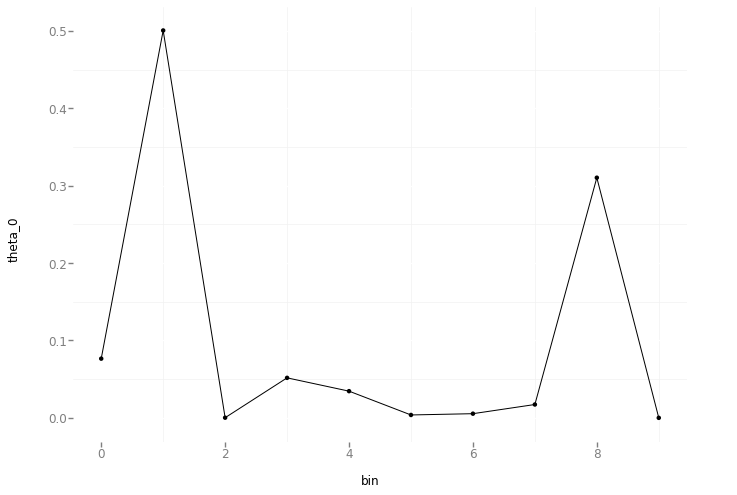

<ggplot: (288574909)>


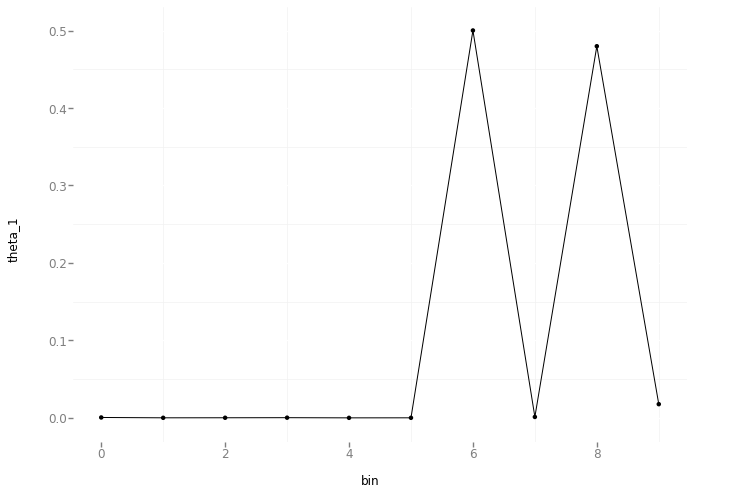

<ggplot: (290528453)>


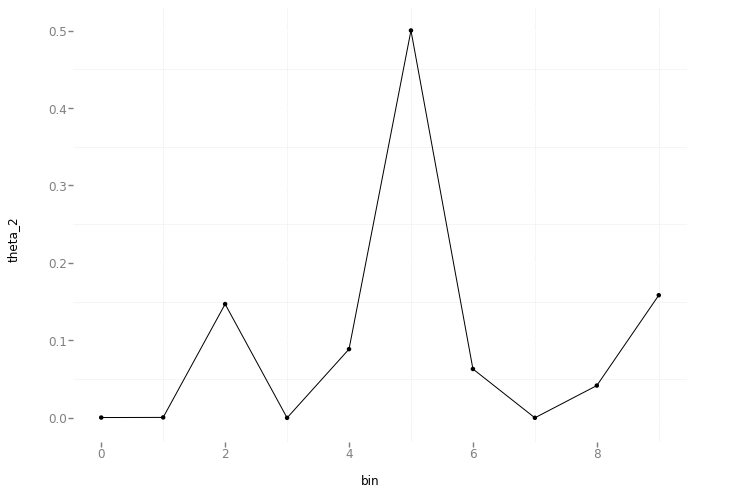

<ggplot: (290125473)>


In [88]:
for chrom in range(3):
    plot = ggplot(aes(x = 'bin', y = 'theta_'+str(chrom)), data = posterior_df) + \
        geom_point() + \
        geom_line() + \
        theme_bw()
    print(plot)

### 2. Combine probability densities

- weight densities by chromosome length
- sum weighted densities across chromosomes
- divide summed weighted chromosome densities by total

In [101]:
lengths = [300, 200, 100]

posterior_weight_df = pd.DataFrame()
for chrom in range(3):
    posterior_weight_df['theta_'+str(chrom)+'_weight'] = posterior_df['theta_'+str(chrom)] * lengths[chrom]

posterior_weight_df['sum'] = posterior_weight_df.sum(axis = 1)
total = posterior_weight_df['sum'].sum()
posterior_weight_df['combined_theta'] = posterior_weight_df['sum'] / total
posterior_weight_df['bin'] = posterior_weight_df.index
posterior_weight_df.head()

,theta_0_weight,theta_1_weight,theta_2_weight,sum,combined_theta,bin
0,22.951723,0.106287,0.040744,23.098753,0.038498,0
1,150.126617,0.019338,0.058212,150.204168,0.250340,1
2,0.066268,0.031091,14.691836,14.789195,0.024649,2
3,15.506092,0.051822,0.001076,15.558990,0.025932,3
4,10.352738,0.008334,8.873044,19.234116,0.032057,4


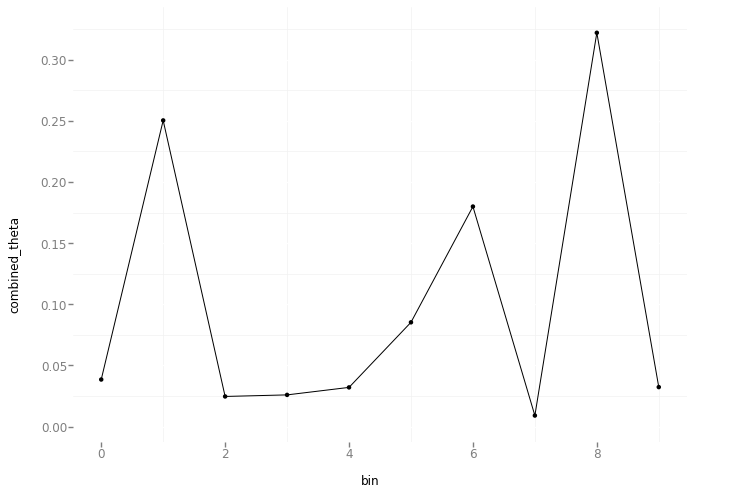

<ggplot: (288756581)>


In [102]:
plot = ggplot(aes(x = 'bin', y = 'combined_theta'), data = posterior_weight_df) + \
    geom_point() + \
    geom_line() + \
    theme_bw()
print(plot)